# Data analysis in Astronomy 

### Homework 3 due 11/18 11:59 pm

### Name:

In [19]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import my_plot_style as mps
import matplotlib.cm as cm
import importlib
import scipy.stats as ss

### 1. A few weeks ago, you have learned how to do simple cross-correlation measurements. 
### Now extend your code to calculate mean($\delta y$) (mean(y_x)-mean(y_0)) when x = 1, 2, 3, 4. Estimate the uncertainty with bootstrap. 
### To do: 
### a. Estimate the uncertainty with the error of the mean and propagate the uncertainty. Compare the estimated uncertainty based on the error propagation and bootstrapping. (5 points) 
### b. Produce a plot with xaxis showing x=[1,2,3,4], and with yaxis showing the corresponding delta y values. (Please include the uncertainty) (5 points)

you can find the data at https://www.dropbox.com/s/ak159coklf1eplf/simple_correlation_10000_x_y_01234.npy?dl=0
### c. Do the linear regression with a model, delta y= a x, and get the best fit a parameter value. Plot your best-fit model in the figure. (15 points) 

### -----------------------------------------------------------------------------------------------------------------

### 2. Finish fitting the black body spectrum


### To do:

### Finish writing the blackbody model and get the best-fit temperature and uncertainty of the spectrum. (10 points) 

In [20]:
# https://www.dropbox.com/s/c8qomgjpbvlj87o/hubble_original_data.fits?dl=0

In [21]:
black_body = pf.getdata('../Week_6/spec-3744-55209-0386.fits',1)
# https://www.dropbox.com/s/n2xrychdkulsqjp/spec-3744-55209-0386.fits?dl=0

In [22]:
search = np.where(black_body['ivar']>0)

In [23]:
flux = black_body['flux'][search[0]].astype('float64')
wavelength = 10**black_body['loglam'][search[0]].astype('float64')
ivar = black_body['ivar'][search[0]].astype('float64')

Text(0, 0.5, 'Flux')

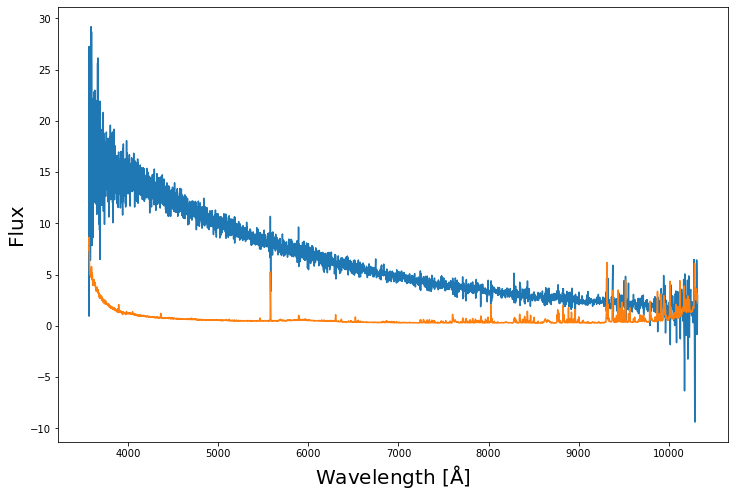

In [24]:
plt.figure(figsize=(12,8))
plt.plot(wavelength,flux)
plt.plot(wavelength,1./np.sqrt(ivar))
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
plt.ylabel('Flux',fontsize=20)

### -----------------------------------------------------------------

### 3. Measuring the rest equavalent width

### The rest equivalent width (the area of flux absorbed by the gas) of an absorption line contains physical information about the abundance of the gas. Astronomers frequently need to measure the rest equivalent width of absorption lines. 

### We now have 6 absorption line spectra. The two absorption lines are MgII 2796 and 2803. Their exact wavelengths are 2796.35 and 2803.53 Angstrom. 

### The goal is to obtain the rest equivalent widths of the two absorption lines for the 6 spectra. 

### To do:

### 1. Write a function consisting of two gaussians with central wavelengths at 2796.35 and 2803.53 Angstrom and obtain the best fit parameters of the gaussians. Based on the best fit parameters, you can get the rest equivalent widths of the absorption lines and the uncertainty of the rest equivalent widths. (You need to input the error array as well when doing the fitting.) (15 points) 

### 2. Plot the best fit models with the absorption line spectra together to demonstrate that what you get is truly the best fit models. (Similar to Figure 11 in https://ui.adsabs.harvard.edu/abs/2017ApJ...850..156L/abstract) (15 points) 

You can find the data at https://www.dropbox.com/s/bp63yptckslvzd5/Simple_absorption_line_spectra.fits?dl=0

The data structure can be found below. 

In [25]:
data = pf.open('Simple_absorption_line_spectra.fits')

In [26]:
spectra = data[0].data
error = data[1].data
wavelength = data[2].data

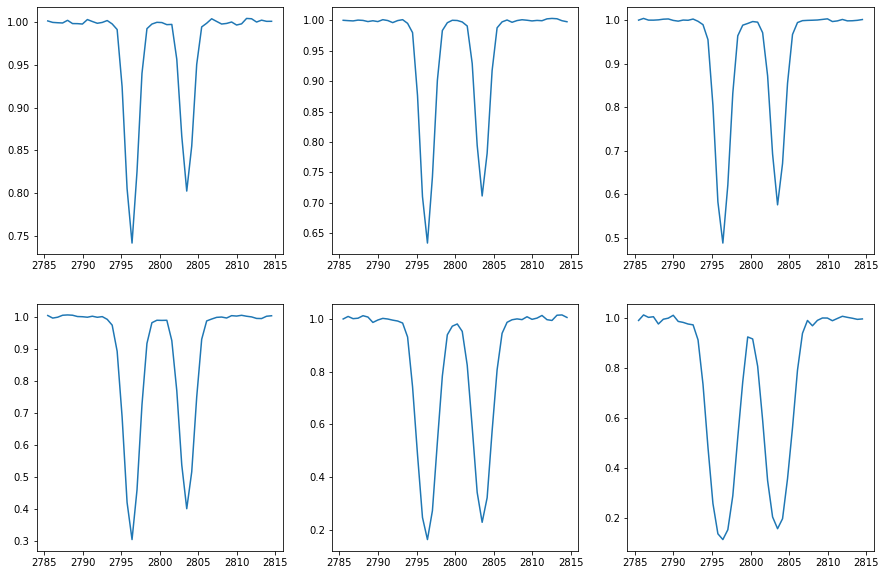

In [27]:
plt.figure(figsize=(15,10))
for i in range(0,len(spectra[:,0])):
    plt.subplot(2,3,i+1)
    plt.plot(wavelength,spectra[i,:])

### -----------------------------------------------------------------------------------------------------------------

### 4. Decomposing QSO spectra with NMF
### In 11/5, we use PCA to decompose the SDSS QSO spectra. Now, we use another technique, called none-negative matrix factoriation (NMF), to do so. 

### TO DO:

### 1. Do the the NMF and explore the outputs! (10 points)

Follow the code above!

1. Data structure matrix [i_object, i_feature]


2. nmf = NMF(n_components=6)
   
   nmf.fit(matrix)
   
   
3. plot wavelength, nmf.components_[i] i=0,1,2,3,4,5,6 (please plot each component separately)

### 2. Please observe the NMF "eigenspectra" and describe what spectral features are captured by each component. (10 points)

### 3. Please use the NMF eigenspectra to reconstruct the observed quasar spectra and plot the first 10 observed quasar spectra (i_object<10) and the reconstructed spectra. (15 points)



In [28]:
from sklearn.decomposition import NMF